The ChEMBL database has a fairly complex schema, viewable [here](http://ftp.ebi.ac.uk/pub/databases/chembl/ChEMBLdb/releases/chembl_24_1/chembl_24_1_schema.png). We will use this notebook for basic exploration of the database, and for planning our data cleaning strategy.

In [1]:
import matplotlib.pyplot as plt
from src.data.chembl_etl import ChEMBL_SQLite

%matplotlib inline

In [2]:
# Let's create a connection to the ChEMBL database, and download it if we don't have it.
conn = ChEMBL_SQLite(path="../data/external/").db_connect()

The most interesting tables are the `compound_structures`, `drug_mechanism`, and `metabolism` tables. Let's investigate their schemas and contents.

In [3]:
# Let's start with the compound_structures table as it seems the easiest
for column in conn.execute("PRAGMA table_info(compound_structures)"):
    print(column)

# From this we can see that we can get the smiles from this table, 
# and `molregno` is the primary key. 

(0, 'molregno', 'BIGINT', 1, None, 1)
(1, 'molfile', 'TEXT', 0, None, 0)
(2, 'standard_inchi', 'VARCHAR(4000)', 0, None, 0)
(3, 'standard_inchi_key', 'VARCHAR(27)', 1, None, 0)
(4, 'canonical_smiles', 'VARCHAR(4000)', 0, None, 0)


The `activities` table provides a large number of activity studies to potentially work with. I'm curious amount the number of each type of bioassay. 

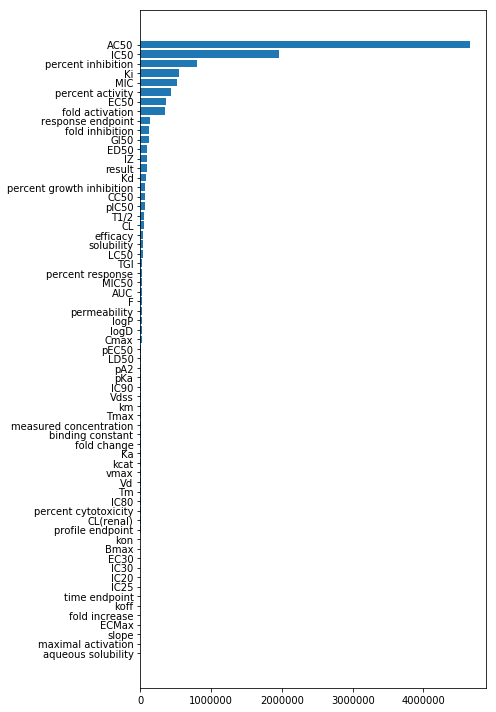

In [5]:
# Let's see which activities are available 
query = """
            SELECT
                label, cnt
            FROM
                bioassay_ontology AS bo,
                (
                    SELECT 
                        bao_endpoint, count(bao_endpoint) AS cnt 
                    FROM
                        activities 
                    GROUP BY
                        bao_endpoint
                ) AS newtb
            WHERE
                bo.bao_id = newtb.bao_endpoint
            ORDER BY cnt DESC;
        """
data = conn.execute(query).fetchall()
fig, ax = plt.subplots(figsize=(7,10))
ax.barh(list(reversed([x[0] for x in data])),
         list(reversed([x[1] for x in data])))
fig.tight_layout()
fig.show()